Graphical illustration of the conflict dynamical system with attraction for two vectors from 3D

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import copy
import random

#setting random initial values for stochastic vectors
def rand_ini(num_elem):
    p_ = np.random.rand(num_elem).reshape(1,-1).astype(np.float64)
    p = normalize(p_, norm='l1')
    return p

#conflict interaction of vectors
def conflict(x,y):
    x_ = np.add(x, np.multiply(x,y))
    return normalize(x_, norm='l1')  

#iterative process for dynamical system
def iterations(p,r,number):
    result = np.empty((9,number+1))
    result[:3,0] = p
    result[3:6,0] = r
    result[6:,0] = normalize(np.multiply(p,r), norm='l1') 
    for i in range(number):
        p_ = conflict(p,r)
        r_ = conflict(r,p)
        p = np.copy(p_)
        r = np.copy(r_)
        result[:3,i+1] = p
        result[3:6,i+1] = r
        result[6:,i+1] = normalize(np.multiply(p,r), norm='l1') 
    return result

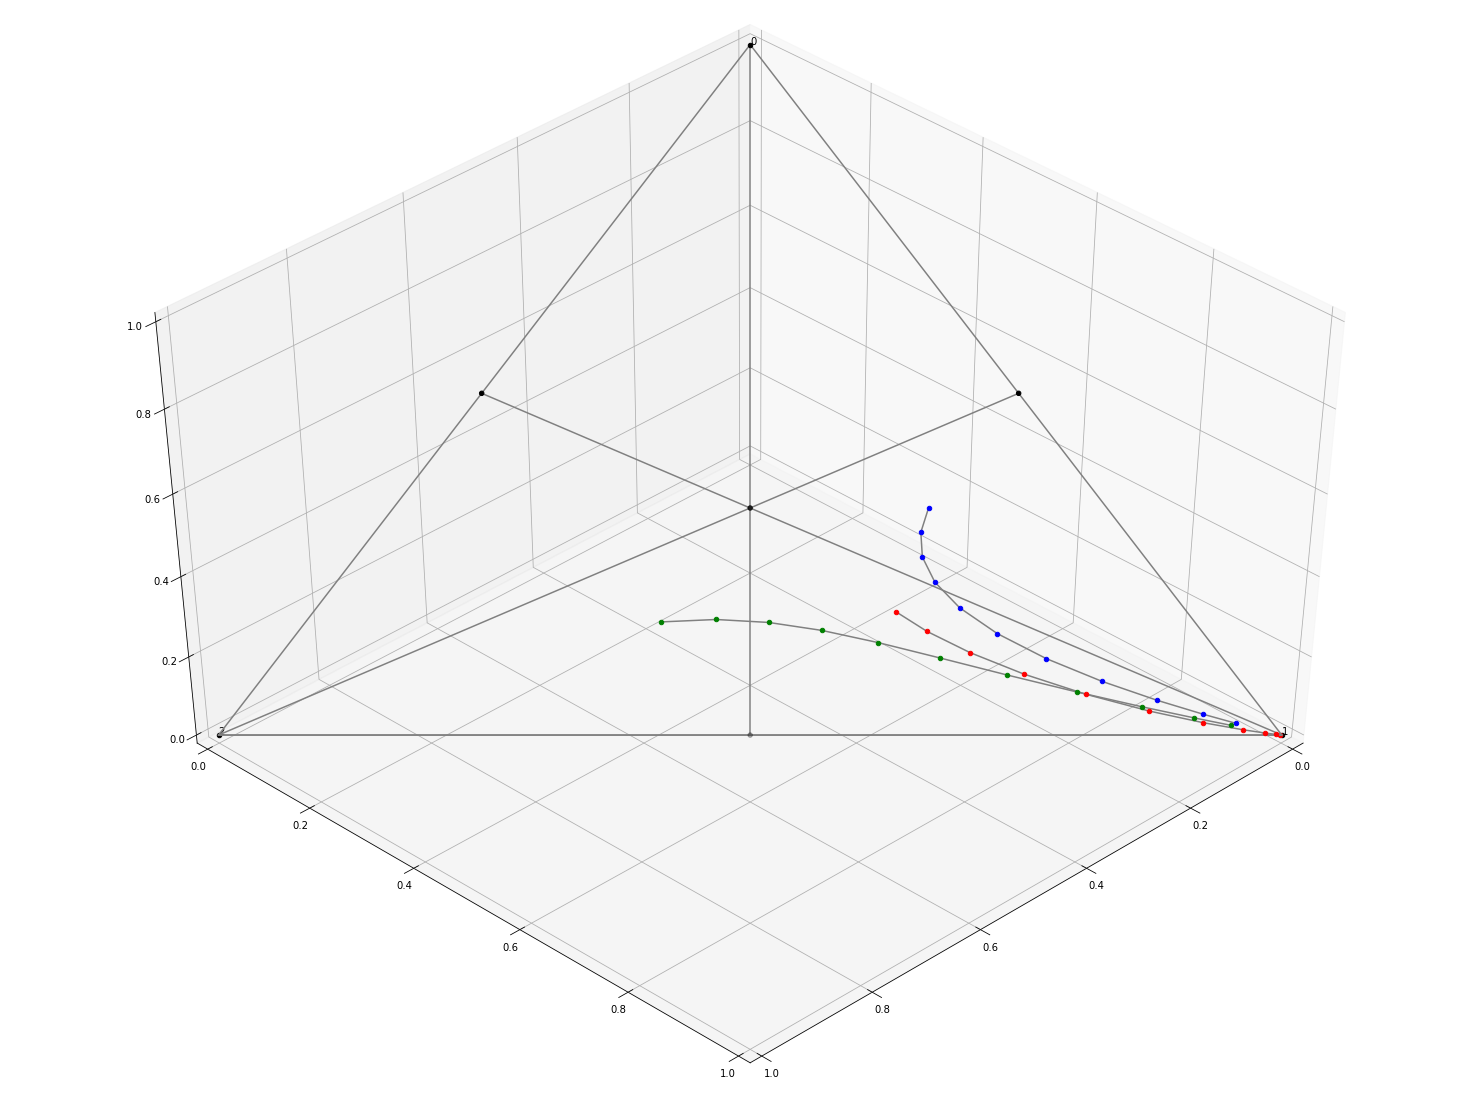

In [2]:
num_elem = 3
#p = rand_ini(num_elem)
#r = rand_ini(num_elem)
eps = 0.001
#p = np.array([0.33-eps, 0.33+eps*0.25, 0.33+eps*0.75])
#r = np.array([0.33-eps, 0.33+eps*0.75, 0.33+eps*0.25])
#r = [1,0,0]
r = np.array([1/2, 1/3, 1/6]).reshape(1,-1).astype(np.float64)
p = np.array([1/6, 1/2, 1/3]).reshape(1,-1).astype(np.float64)

number = 10
PR = iterations(p,r,number)

PX = PR[0,:]
PY = PR[1,:]
PZ = PR[2,:]
RX = PR[3,:]
RY = PR[4,:]
RZ = PR[5,:]
prodX = PR[6,:]
prodY = PR[7,:]
prodZ = PR[8,:]

    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)
ax.view_init(45, 45)
e1 = [0, 0, 1]
e2 = [0, 1, 0]
e3 = [1, 0, 0]
ax.plot(e1, e2, e3, color='gray')
ax.plot(e2, e3, e1, color='gray')
a0 = [1/3, 1/3, 1/3]
a1 = [1/2,0,1/2]
a2 = [1/2,1/2,0]
a3 = [0,1/2,1/2]
A = np.array([a0, a1, a2, a3])

ax.set_xlim3d(0,1.0)
ax.set_ylim3d(0,1.0)
ax.set_zlim3d(0,1.0)

ax.scatter(A[:, 0], A[:,1], A[:,2], color='k', s=20)
ax.plot(np.array([a0[0], a1[0]]), np.array([a0[1], a1[1]]), np.array([a0[2], a1[2]]), color='gray')
ax.plot(np.array([a0[0], a2[0]]), np.array([a0[1], a2[1]]), np.array([a0[2], a2[2]]), color='gray')
ax.plot(np.array([a0[0], a3[0]]), np.array([a0[1], a3[1]]), np.array([a0[2], a3[2]]), color='gray')
ax.plot(np.array([a0[0], e1[0]]), np.array([a0[1], e1[1]]), np.array([a0[2], e1[2]]), color='gray')
ax.plot(np.array([a0[0], e2[0]]), np.array([a0[1], e2[1]]), np.array([a0[2], e2[2]]), color='gray')
ax.plot(np.array([a0[0], e3[0]]), np.array([a0[1], e3[1]]), np.array([a0[2], e3[2]]), color='gray')

ax.plot(PX,PY,PZ, color='gray')
ax.plot(RX,RY,RZ, color='gray')
ax.plot(prodX,prodY,prodZ, color='gray')
for i in range(number+1): #plot each point + it's index as text above
    ax.scatter(PX[i],PY[i],PZ[i],color='b') 
    ax.scatter(RX[i],RY[i],RZ[i],color='g') 
    ax.scatter(prodX[i],prodY[i],prodZ[i],color='r') 

for i in range(3): #plot each point + it's index as text above
    ax.scatter(e1[i],e2[i],e3[i],color='k') 
    ax.text(e1[i],e2[i],e3[i],  '%s' % (str(i)), size=10, zorder=1, color='k') 



plt.show()

In [4]:
print(normalize([1,1,1], norm='l1'))


[[ 0.33333333  0.33333333  0.33333333]]


C:\Users\mika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
